# Path Dependent Options - Asian Options

Asian options are the path-dependent options which relies on the average price of the underlying asset over time.

Computing prices of such options is quite challenging. The reason is its path-dependent nature. We may have N terminal prices according to a Binomial Tree, but the number of paths is not the same, it will be high.
For a binomial tree with N-steps, the total number of possible paths is $2 ^ N$.

For such systems, we use Monte-Carlo simulations to do the computations.
MC methods use simulations and random sampling to approximate solutions to problems, particularly those with a probabilistic nature.

It's difficult to compute all the paths as it would lead to higher computation costs. However, more the number of simulations, more is the accuracy of the result obtained.

So let's try to compute the price of an Asian Call Option using MC simulations.

In [1]:
# Import required library
import numpy as np

Next, let's write the function to compute option prices.
Since we want a random path that could be followed by the underlying price. We'll use `np.random.binomial()`.

In [2]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)
    Asian = np.zeros([M])
    S = np.zeros([M, N+1])
    S[:,0] = S_ini

    for j in range(M):
        random = np.random.binomial(1, p, N+1)
        Total = S_ini
        for i in range(1,N+1):
            if random[i] == 1:
                S[j,i] = S[j,i-1] * u
                Total = Total + S[j,i]
            else:
                S[j,i] = S[j,i-1] * d
                Total = Total + S[j,i]
                
        Asian[j] = np.exp(-r * T) * max(Total / (N + 1)- K, 0)
    return S, Asian

`random = np.random.binomial(1, p, N + 1)` generates a sequence of random path. The reason we are using `binomial` here is because it deals in two outputs: Success or failure.
Our underlying asset has too directions at any point of time: either go up or go down. `p` is the probability of upside movement and `N + 1` is the number of time steps wich we are simulating.

Now running the above function to compute the price of an call option.

Let $S_0 = 100, K = 90, T = 1, r = 0, \sigma = 0.3, N = 2500, M = 10000$,
where M = Number of simulations or the number of paths for which we calculate the option price.

In [4]:
S, Asian = asian_option_mc(100, 90, 1, 0, 0.3, 2500, 10000)

We'll take the mean of all option prices to get a closer value.

In [5]:
print(np.mean(Asian))

12.671418351807892


Next, let's perform multiple simulations together and see what the value comes in for the option price

In [6]:
M = np.arange(1000, 16000, 1000)
asian_price = []

Let's run the function for different simulations together

In [7]:
for i in range(len(M)):
    S, Asian = asian_option_mc(100, 90, 1, 0, 0.3, 2500, M[i])
    asian_price.append(np.mean(Asian))

Let's print the values we got for the call option through different simulations

In [8]:
asian_price

[12.178199163712613,
 12.92289876060201,
 12.29594579336966,
 12.40583844532056,
 12.725384437424879,
 12.426017508630814,
 12.697095160084352,
 12.711473907900922,
 12.66218489382058,
 12.566271574378622,
 12.700596422649179,
 12.710956618119331,
 12.634631893118858,
 12.482948299439412,
 12.585168414112138]

Let's plot these value against number of simulations.

In [10]:
import matplotlib.pyplot as plt

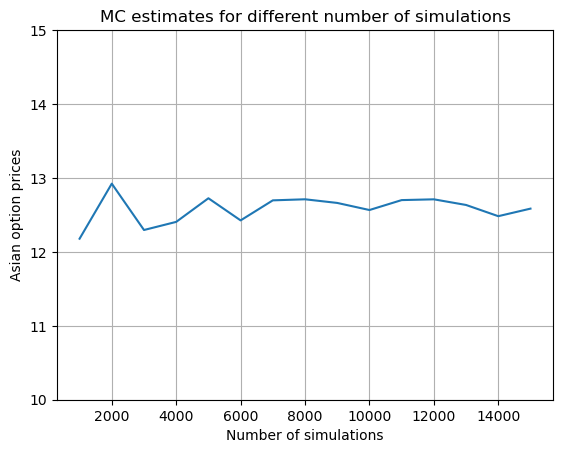

In [11]:
plt.plot(M, asian_price)
plt.ylim([10, 15])
plt.title("MC estimates for different number of simulations")
plt.xlabel("Number of simulations")
plt.ylabel("Asian option prices")
plt.grid(True)
plt.show()

As you can see above, if we increase the number of simulations, our accuracy tends to increase and the option prices start to settle around some value.